# Analizado los crímenes en la Ciudad de Nueva York

__Integrantes:__ 
- Daniel Flores
- Francisco Fernandez

Sección G1


## Hito 1

### Objetivo

El objetivo del problema es generar dos modelos predictivos relacionados con los stop-and-frisk (detenciones y cateos) realizadas por la policía de NYC (NYPD).

El primer modelo debe predecir si un determinado procedimiento terminará en arresto o no en base a las características medidas del sospechoso: género, raza y que se arrestado en uno de los cincos barrios.

El segundo modelo debe predecir si el procedimiento finalizará en una acción violenta.

### Contexto

Cada vez que un policía detiene a una persona en NYC, el oficial debe completar un formulario registrando los detalles de la detención. Los formularios eran llenados a mano hasta el año 2017, cuando los formularios en papel se conviertieron a electrónicos. La policía informa las detenciones y cateos de dos maneras: un informe resumido publicado trimestralmente y una base de datos completa publicada anualmente.

Los informes trimestrasles son publicados cada tres meses, incluyen información de detenciones, arrestos y citaciones. Los datos son desglosados por distrito policial, raza y genero de la persona detenida.

La base de datos anual incluye practicamente toda la información registrada por el oficial de policía después de una detención, tal como la edad, si la persona fue cateada, si tenía un arma o si se recuperó un arma de fuego, si se usó fuerza física en la detención, y la ubicación exacta de la detenciín dentro del distrito policial. La NYPD sube esta base de datos a su página web anualmente. La base de datos contiene más de 100 variables y dependiendo del año, sobre 10.000 observaciones, cada registro representa una detención realizada por un oficial de policía.

### Desarrollo de la solución

Se seguirá el flujo habitual de machine learning:

1. **Importación/obtención de datos.**
2. **Análisis de datos:** Se analizarán los datos pérdidos y outliers, se generarán tendencias y estadística descriptiva de los atributos y vectores objetivos. Se presentará el esquema de recodificación en caso de requerirse.
3. **Preprocesamiento:** Se transformarán (recodificarán) y limpiarán datos. Se normalizarán los atributos. 
4. **Búsqueda y selección de algoritmos a ocupar en base a objetivos del modelo.** En esta sección en base al conocimiento previo y a búsqueda de problemas similares se seleccionarán los algoritmos a utilizar para los modelos. Selección de métricas para modelos.
5. **Entrenar y validación del modelo:** 
Se dividirán los datos en grupos: Entrenamiento, validación y **prueba PENDIENTE NOMBRE**. Se entrenarán y compararán los modelos utilizando los algoritmos seleccionados del item anterior en un GridSearch con la métrica previamente seleccionada. Los modelos tendrán hyperparámetros básicos.
Se seleccionará el modelo con mejor métrica y se ajustarán sus hyperparámetros utilizando los datos de validación.
Podría ser necesario recodificar datos.
6. **Evaluación del modelo**
Finalmente se evaluará el modelo seleccionado para cada problema, obteniéndo sus métricas, y finalmente se serializará.

## Aspectos computacionales

Se utilizara las principales librerias para el analisis de datos, las cuales son:

### Bibliotecas de Python 
 
- `pandas`:  Permite realizar tareas de manipulación, agregación y visualización de datos de forma más sencilla.
- `numpy`: Agrega soporte para vectores y matrices y  funciones matemáticas de alto nivel para operar con esos datos. 
- `matplotlib`: Permite crear visualizaciones de datos simples.
- `seaborn`: Permite visualizar modelos estadísticos. Se basa en Matplotlib.
- `statsmodels`: Estimación de modelos estadísticos, en nuestro caso la regresion logística.
- `scikit-learn`: Implementa aprendizaje de máquina, incluye varios algoritmos de clasificación, regresión y métricas, incluyendo varias herramientas útiles, como separación de datos de entrenamiento, validación cruzada y codificación de variables categóricas.
- `factor_analizer`: Permite implementar el EFA (análisis factorial exploratorio).
- `missingno`: Biblioteca para la visualización de datos perdidos.
- `warnings`: Evitará que aparezcan las advertencias de avisos de deprecación.
- `IPython.display`: Embellece el output de salida. 


### Módulos y funciones de Python

- `utils`: Módulo que contiene función para graficar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_validate

import missingno as msngo
import warnings

from IPython.display import display, Markdown

from utils import get_graph

pd.set_option("display.max_rows", 112)
pd.set_option("display.max_info_columns", 112)

warnings.filterwarnings('ignore')

## Descripción de datos

### Base de datos completa

La base de datos es del año 2009, contiene sólo el 1% de los datos, tiene 111 columnas, con dos tipos de escalas de medición: nominales y escalar. El detalle de los datos se muestra a continuación.

In [2]:
df_spec = pd.read_csv("2009 SQF File Spec.csv", sep=";")
df_spec.set_index("Variable", inplace=True)

df_spec.loc[:, ["Label", "Measurement Level", "Position"]].head(df_spec.shape[0])

,Label,Measurement Level,Position
Variable,,,
year,YEAR OF STOP (CCYY),Nominal,1
pct,PRECINCT OF STOP (FROM 1 TO 123),Nominal,2
ser_num,UF250 SERIAL NUMBER,Nominal,3
datestop,DATE OF STOP (MM-DD-YYYY),Nominal,4
timestop,TIME OF STOP (HH:MM),Scale,5
recstat,RECORD STATUS,Nominal,6
inout,WAS STOP INSIDE OR OUTSIDE ?,Nominal,7
trhsloc,WAS LOCATION HOUSING OR TRANSIT AUTHORITY ?,Nominal,8
perobs,PERIOD OF OBSERVATION (MMM),Nominal,9


### Variables más importantes

A continuación se muestran las variables más relevantes para ambos modelos son:

In [3]:
# Variables más importantes

main_attr = [
    "arstmade", "sex", "race", "addrpct",
    "pf_hands", "pf_wall", "pf_grnd", "pf_drwep",
    "pf_baton", "pf_hcuff", "pf_pepsp", "pf_other"
]

df_spec.loc[main_attr, ["Label"]].head(df_spec.shape[0])

,Label
Variable,
arstmade,WAS AN ARREST MADE ?
sex,SUSPECT'S SEX
race,SUSPECT'S RACE
addrpct,LOCATION OF STOP ADDRESS PRECINCT
pf_hands,PHYSICAL FORCE USED BY OFFICER - HANDS
pf_wall,PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAIN...
pf_grnd,PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GR...
pf_drwep,PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN
pf_baton,PHYSICAL FORCE USED BY OFFICER - BATON


In [4]:
# Importa base de datos y reemplaza guion por guion bajo

df = pd.read_csv("2009_1perc.csv", index_col=0)

### Análisis y visualización de datos pérdidos

Text(0.5, 1.0, 'Datos perdidos')

<Figure size 432x288 with 0 Axes>

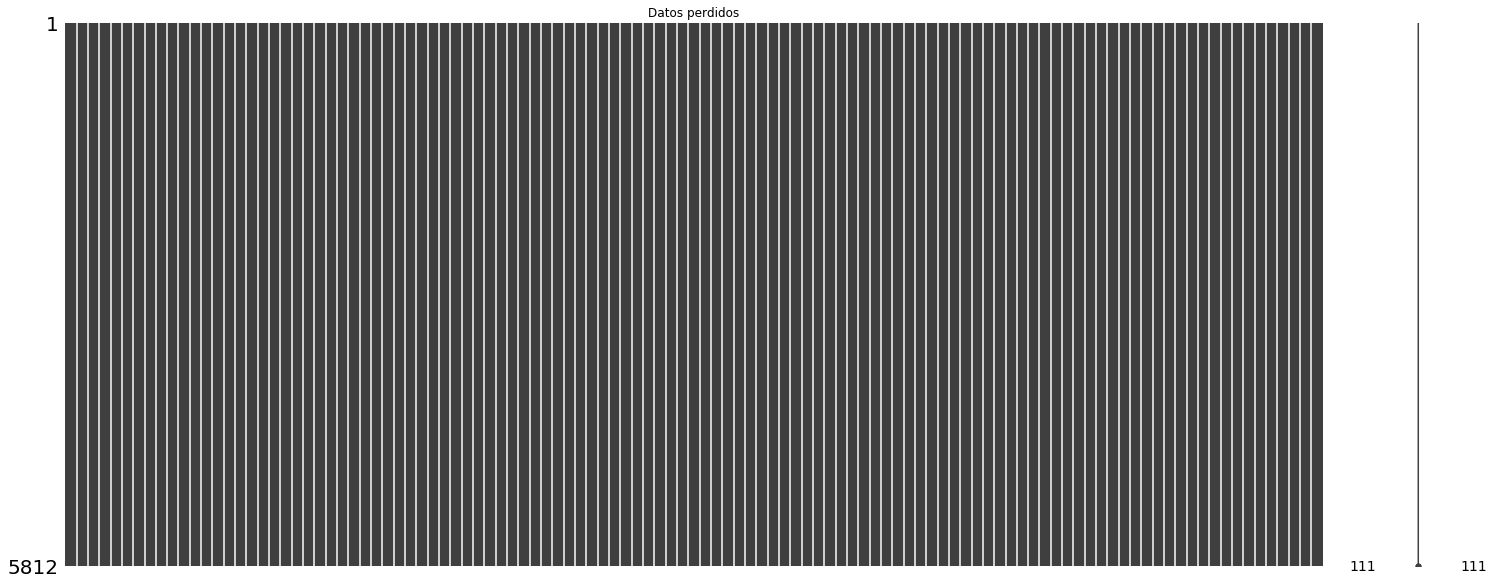

In [5]:
plt.figure()
msngo.matrix(df)
plt.title("Datos perdidos")

No hay datos pérdidos en la base de datos.

### Análisis y visualización de datos

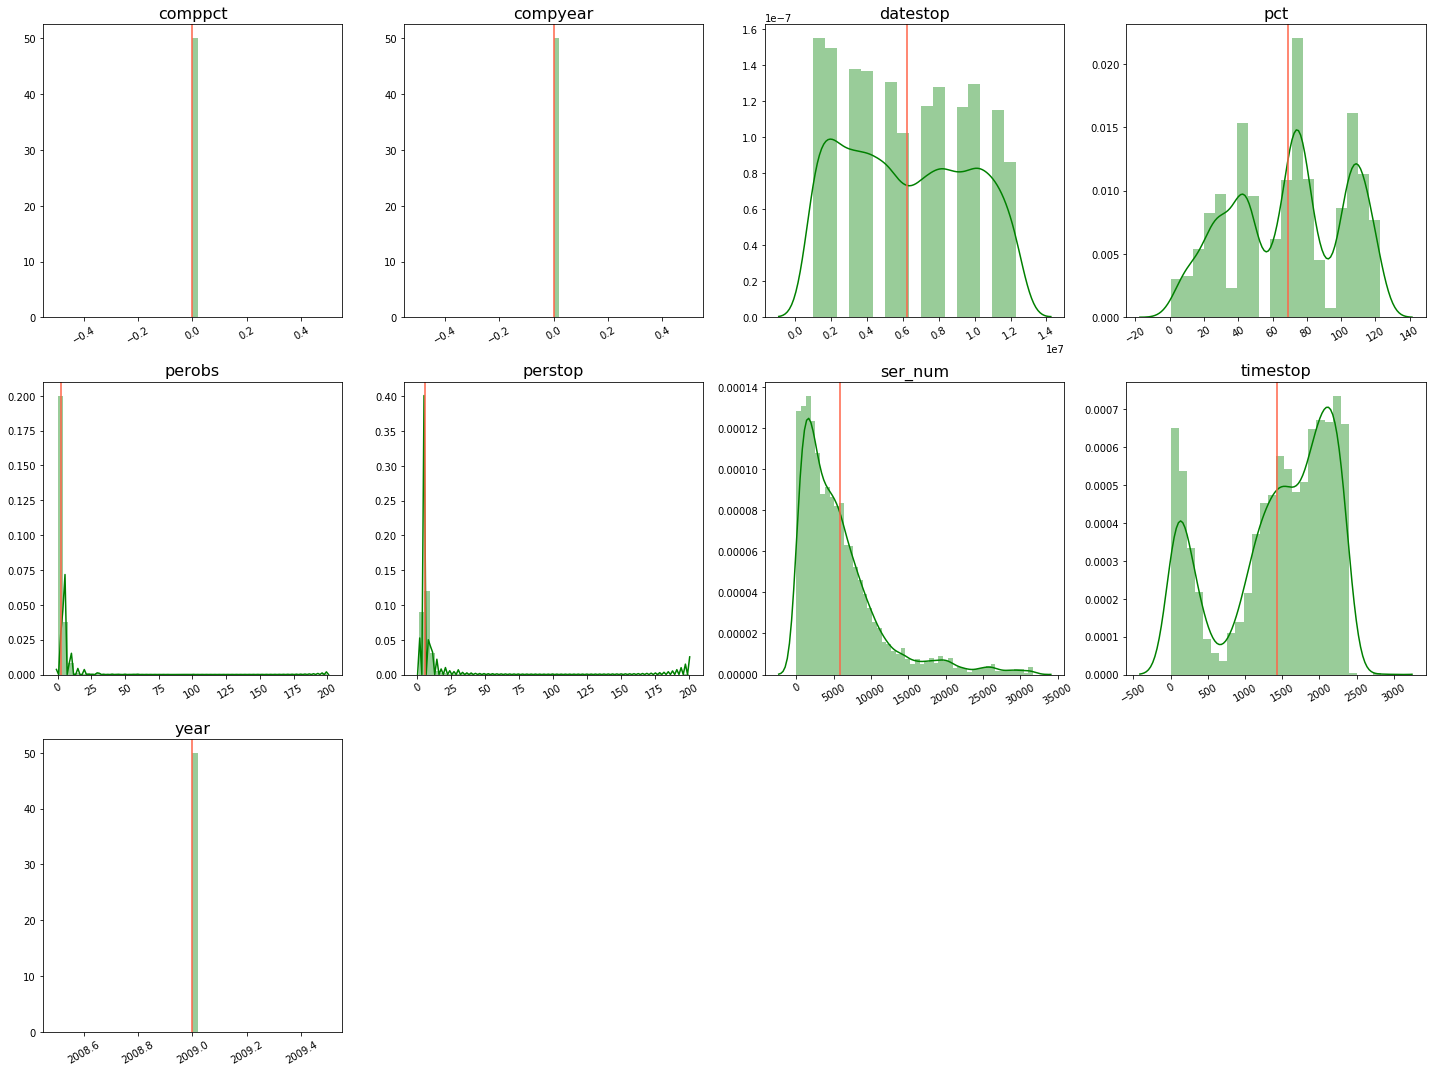

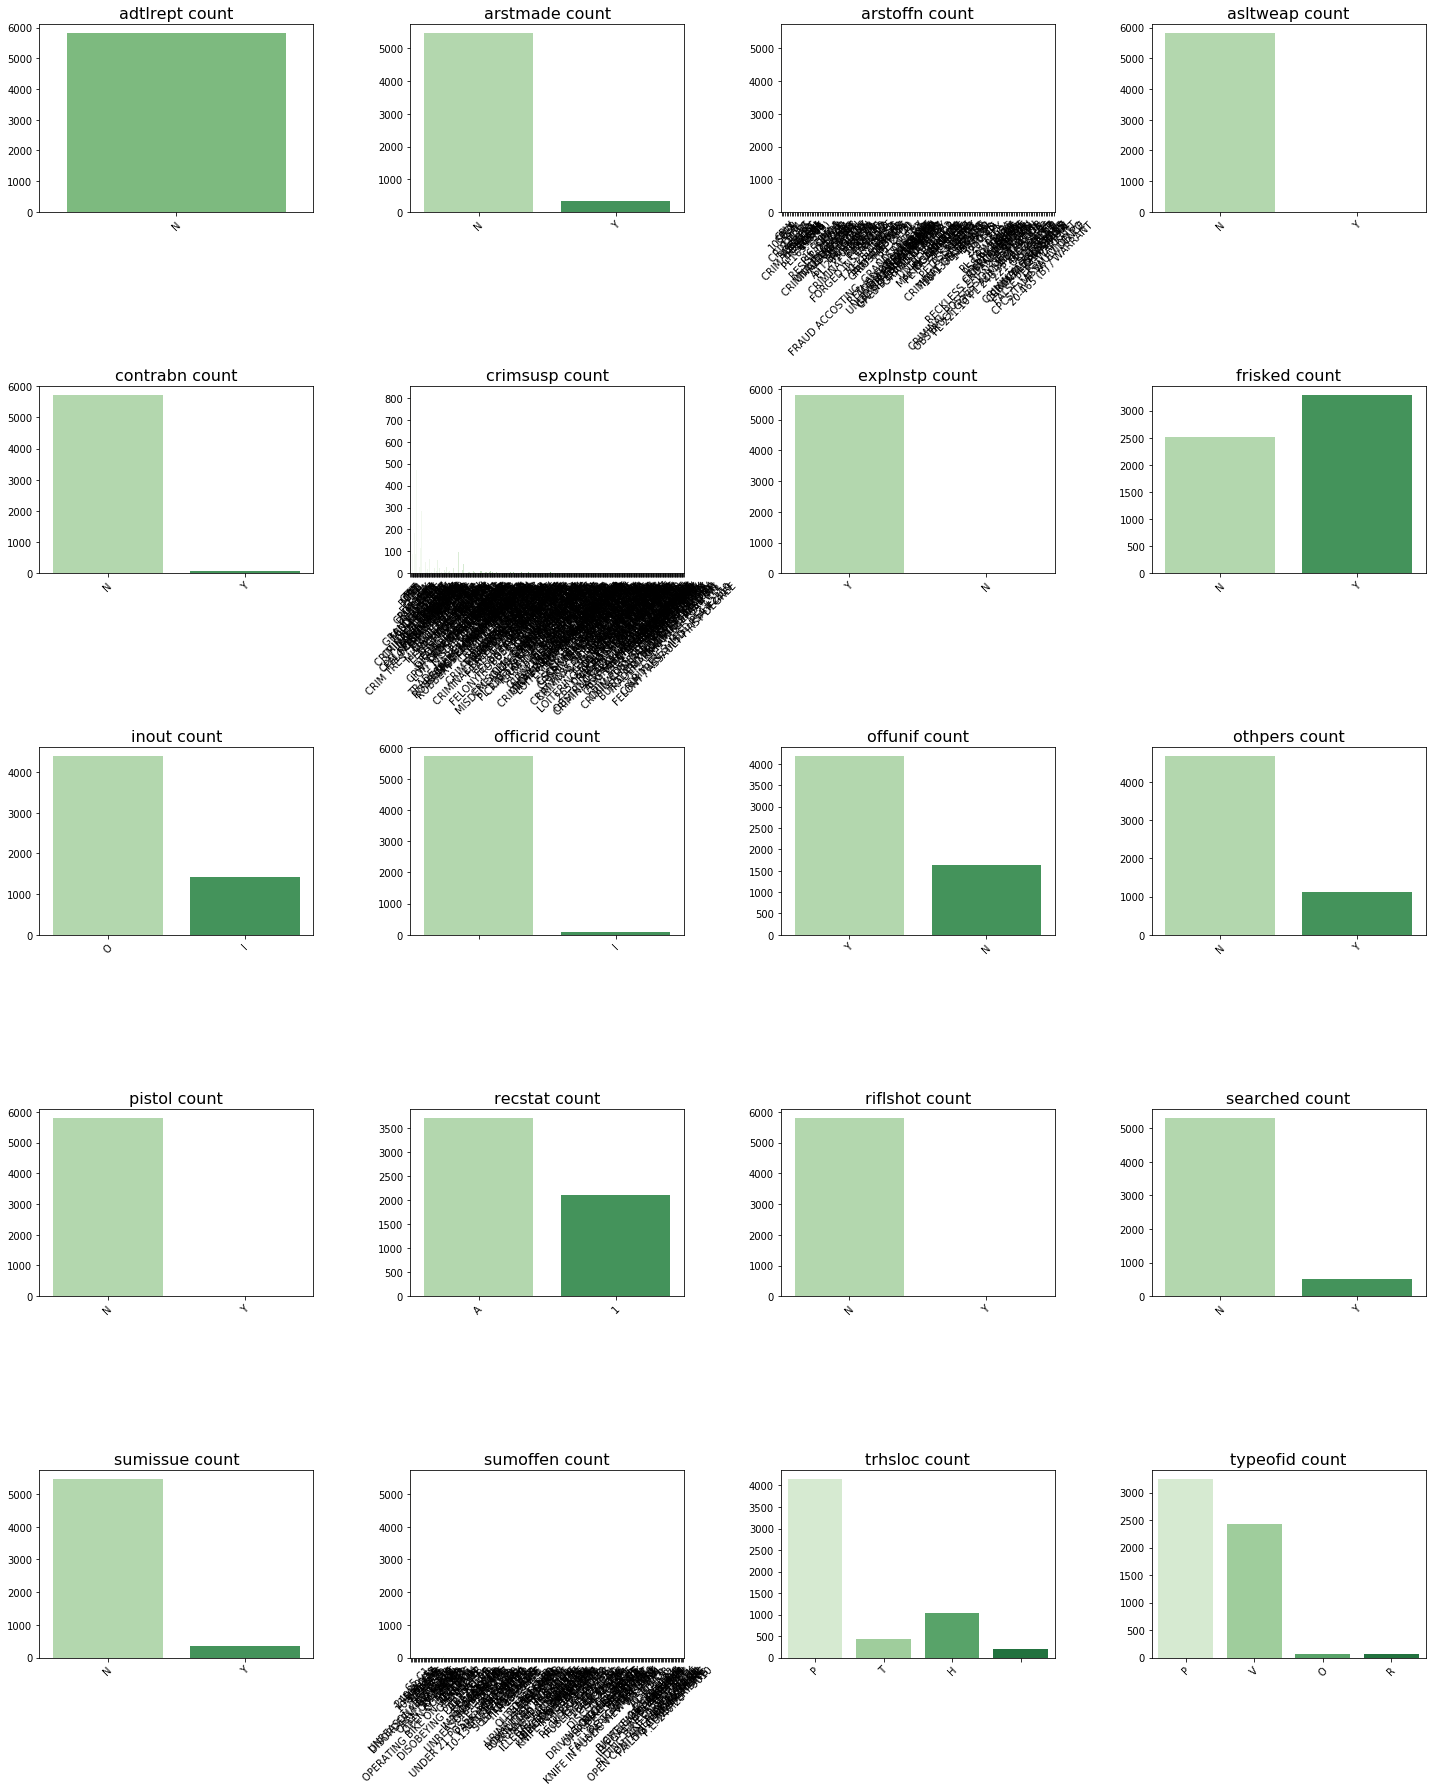

In [11]:
get_graph(df.iloc[:, 0:29])

<Figure size 1440x0 with 0 Axes>

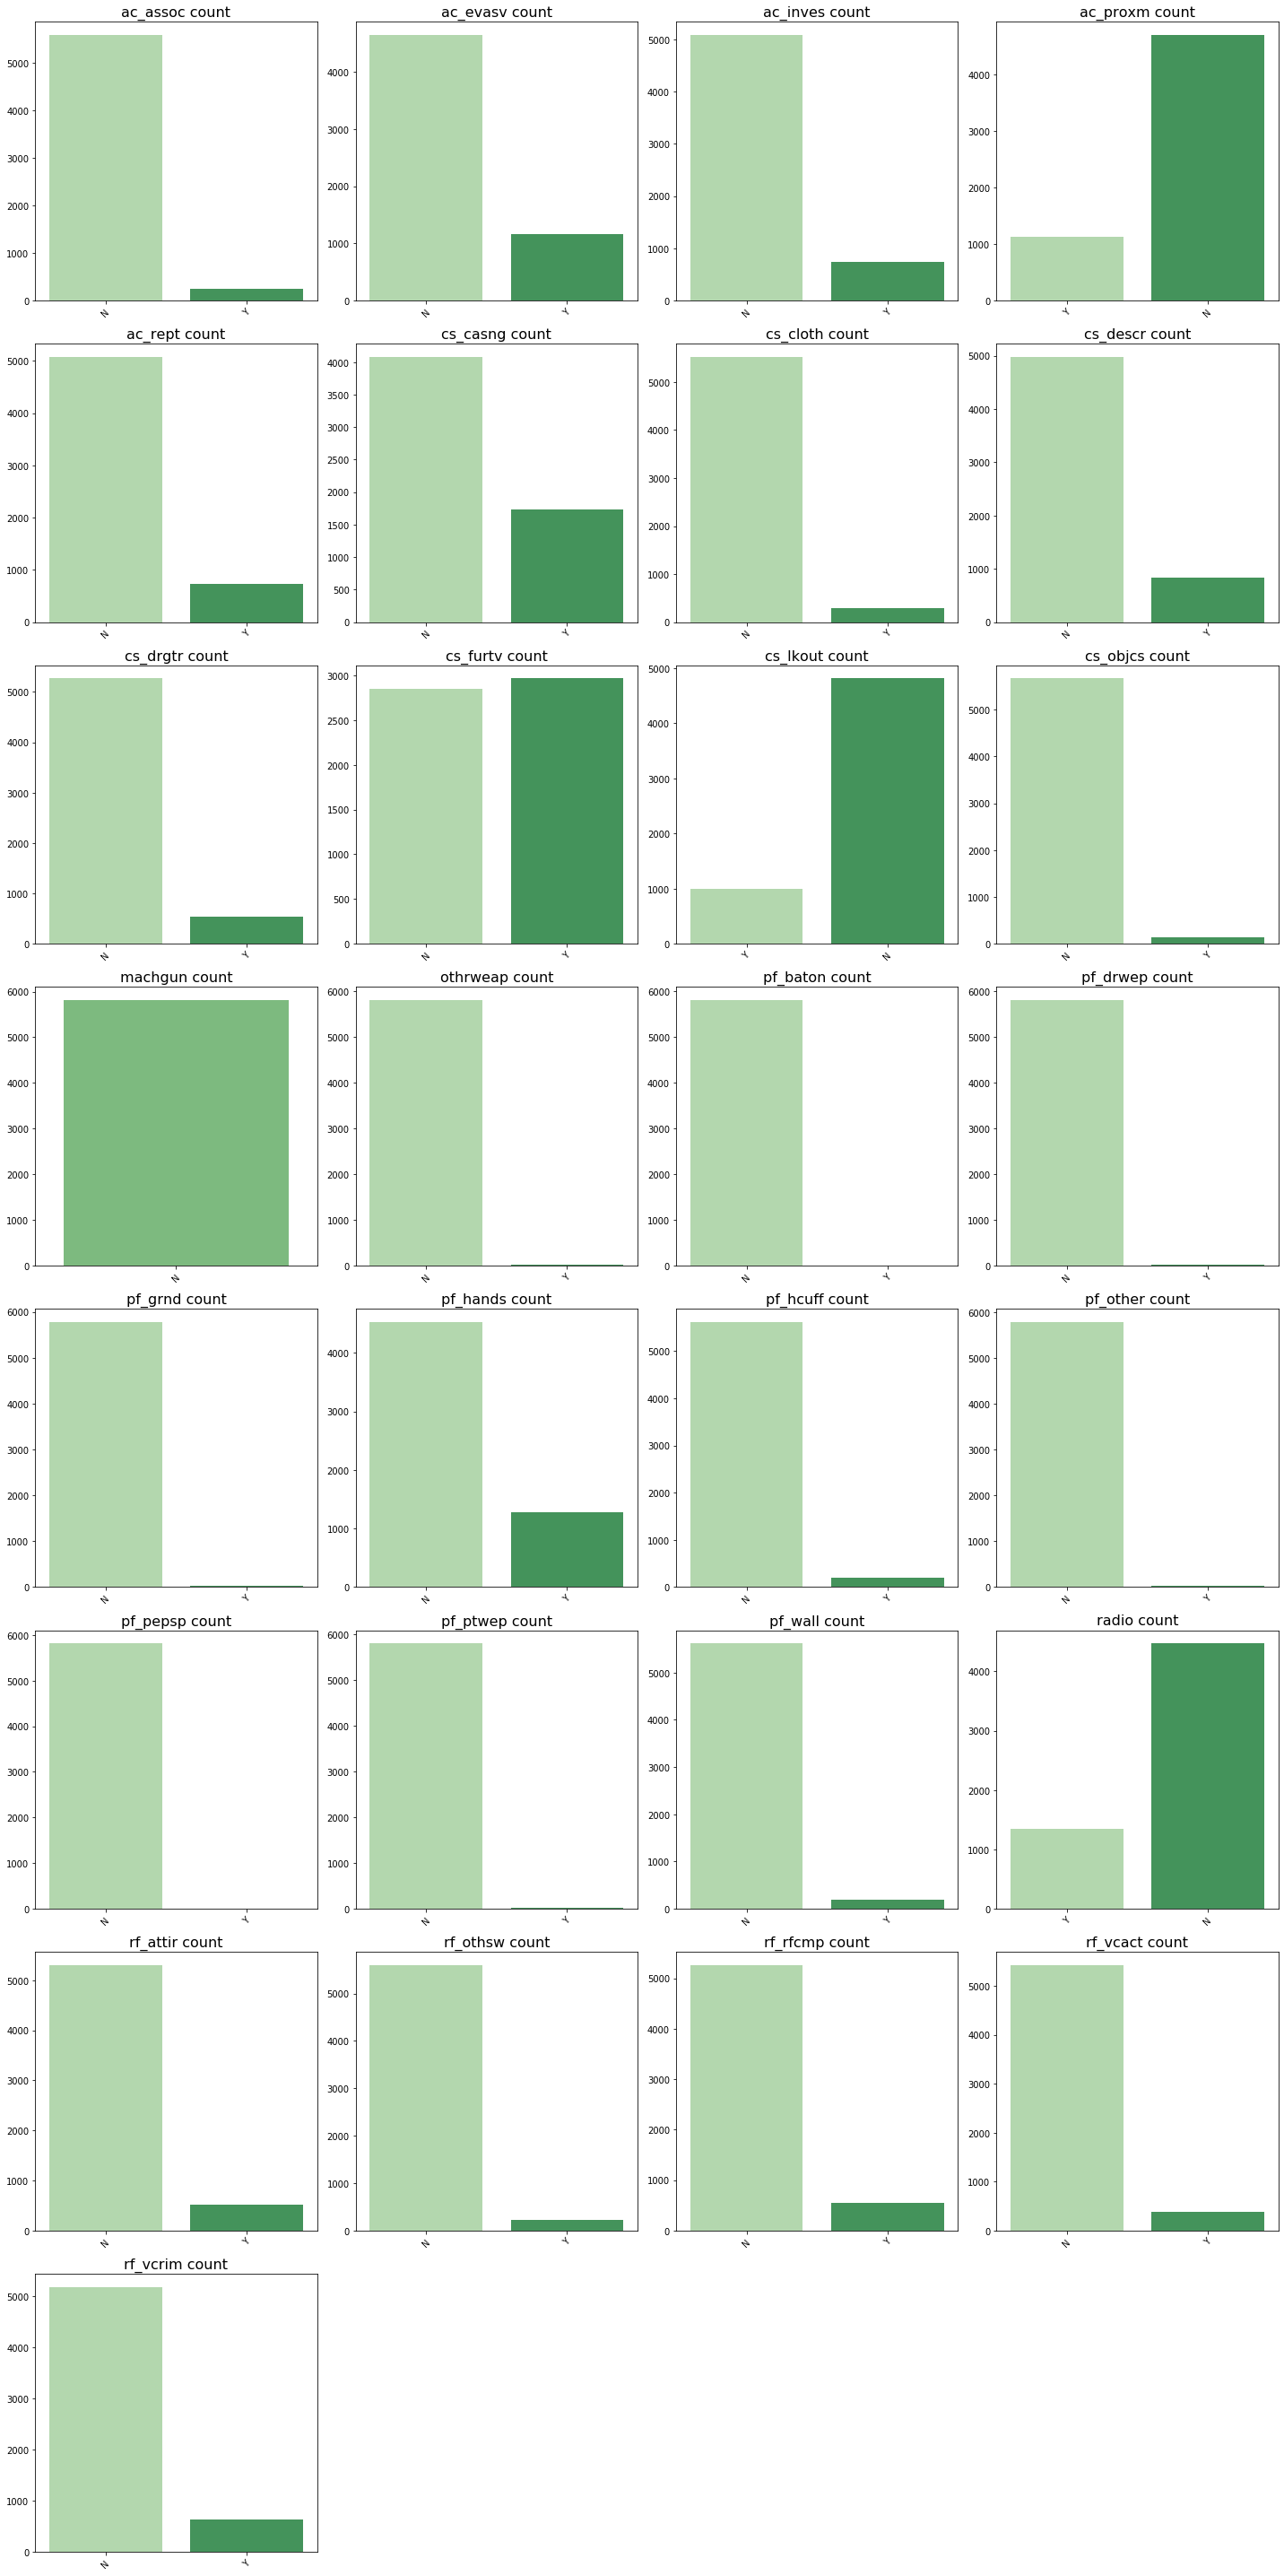

In [12]:
get_graph(df.iloc[:, 30:59])

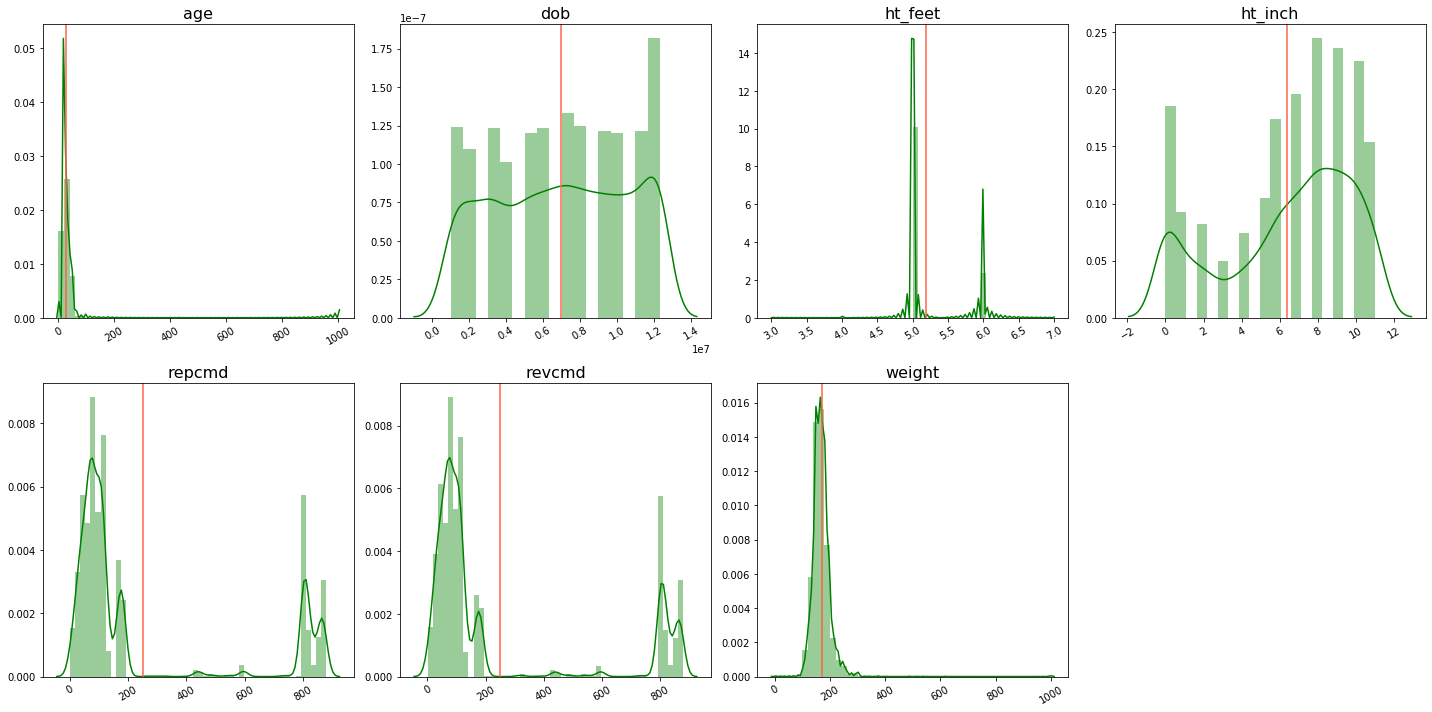

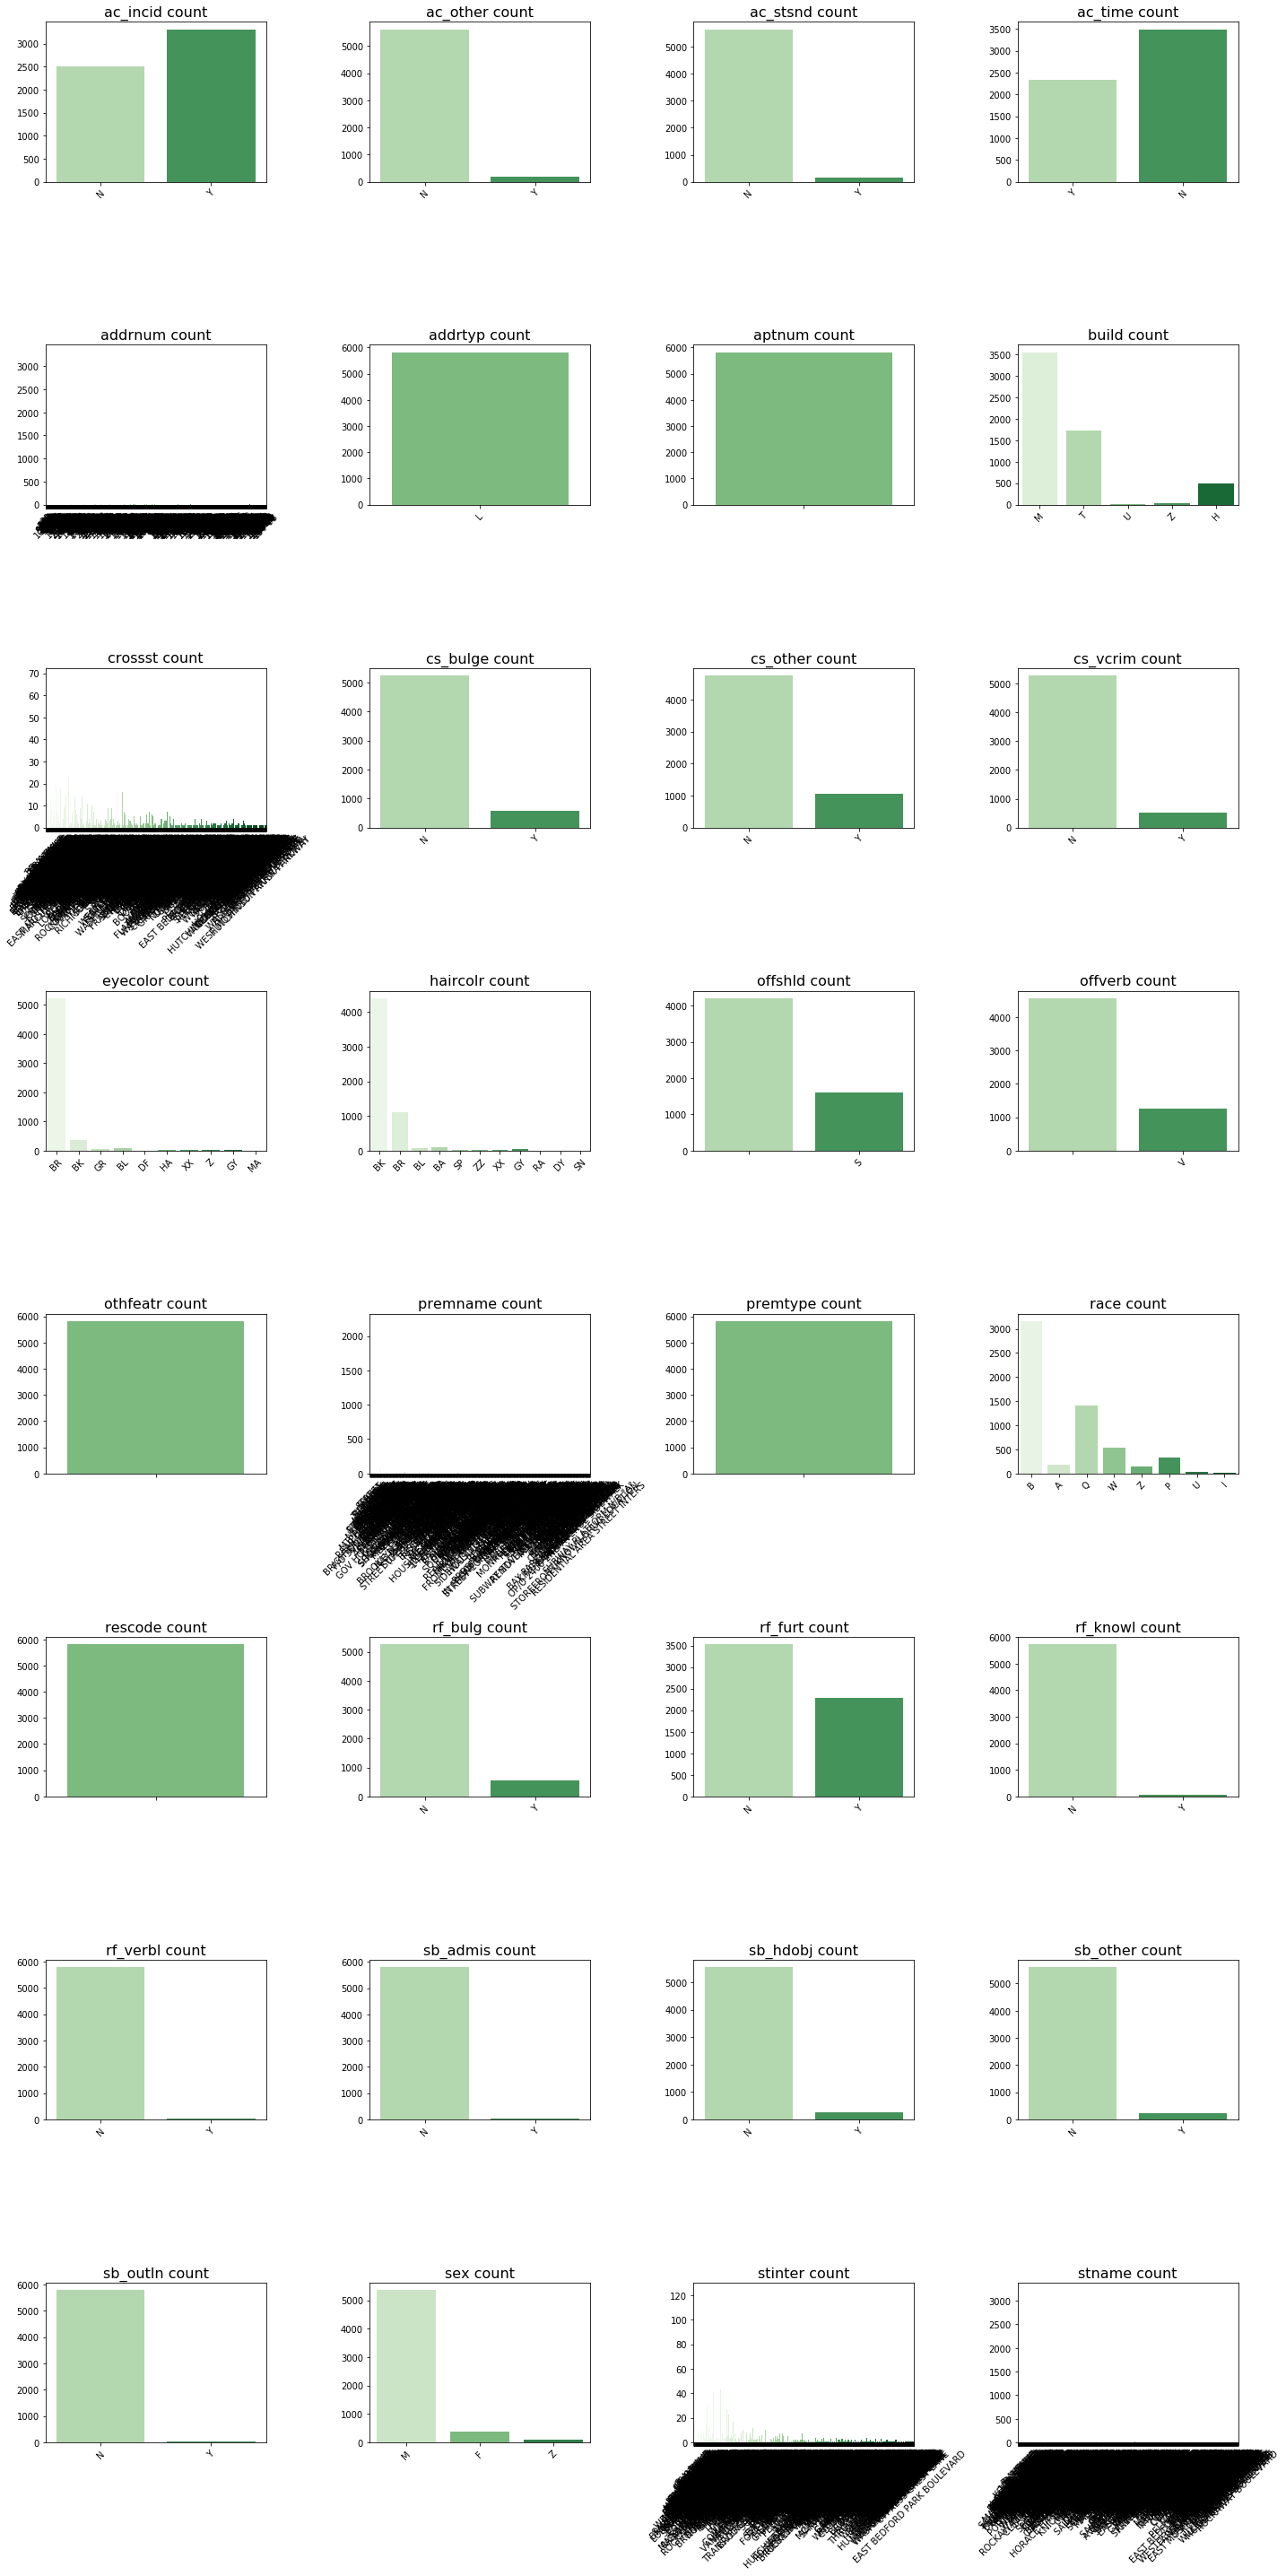

In [13]:
get_graph(df.iloc[:, 60:99])

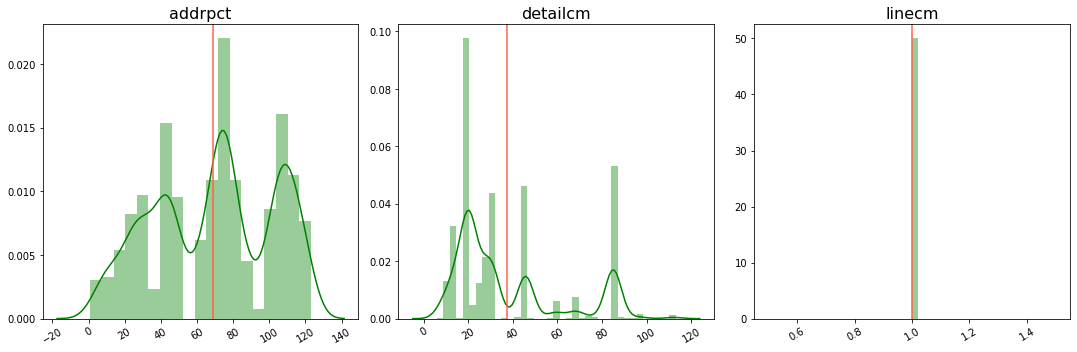

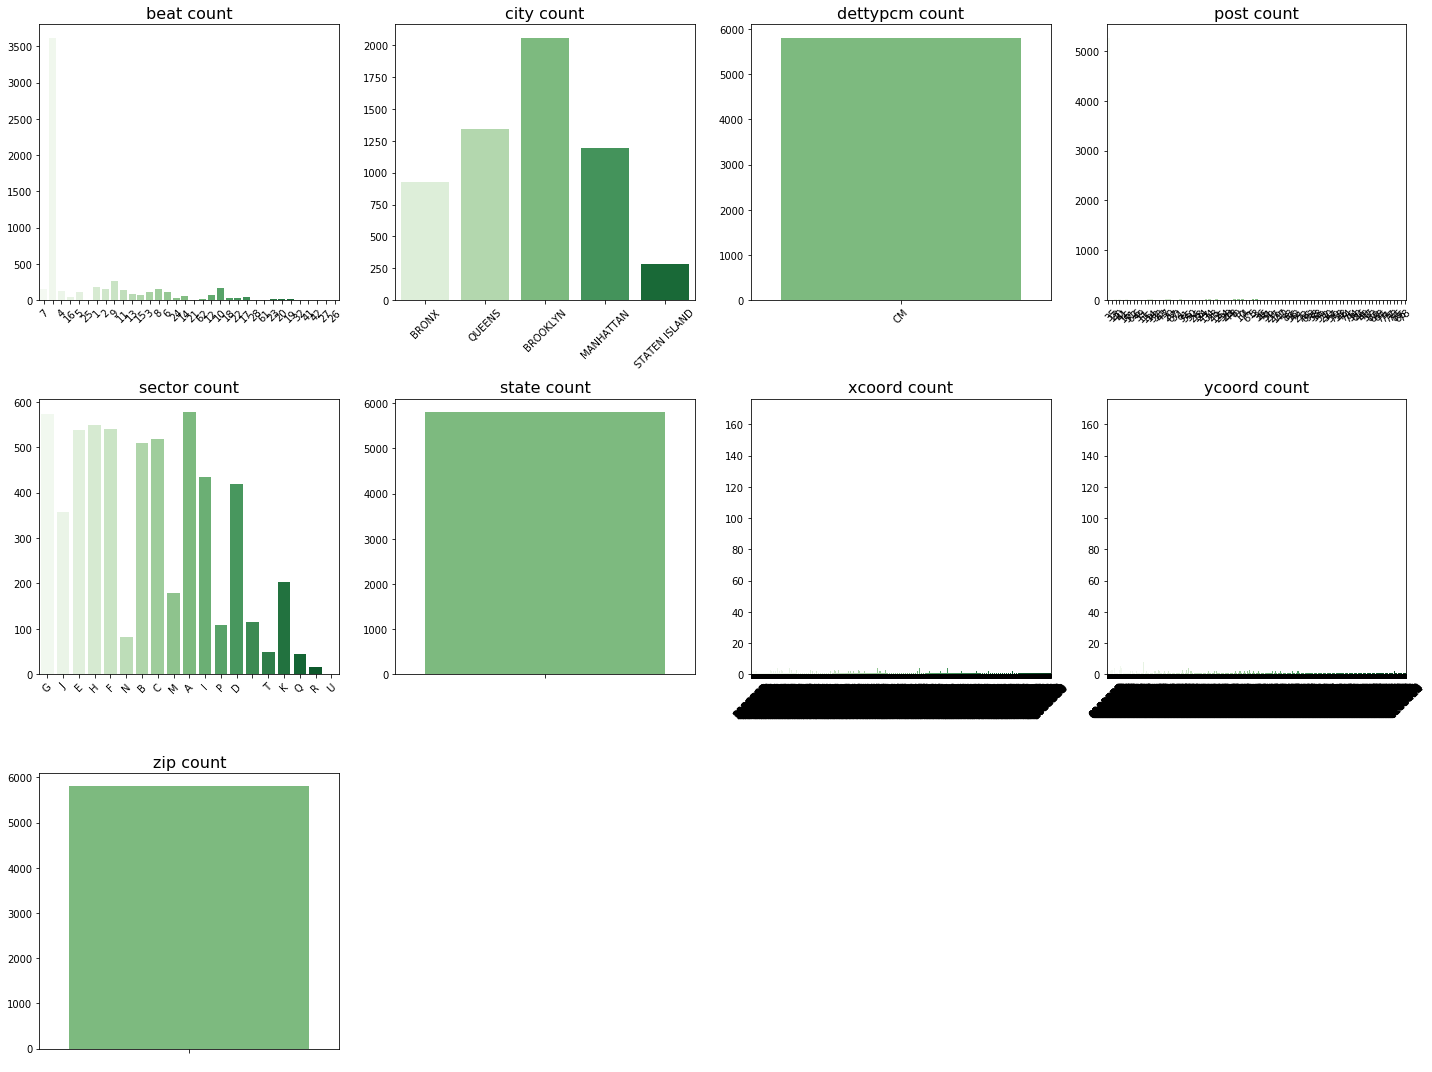

In [14]:
get_graph(df.iloc[:, 99:])